<a href="https://colab.research.google.com/github/bridyash13/Data_Analytics_Lab_Batch_A/blob/main/DA_Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
#INITIALIZING AND IMPORTING REQUIRED LIBRARIES
import sklearn
import pandas as pd
import numpy as np
import scipy as sp

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#IMPORTING DATA AND CREATING A DATAFRAME
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_Data.csv')
raw_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [73]:
#GETTING A LOOK INTO THE DATA
raw_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [74]:
#REMOVING NON-NUMERIC COLUMNS AND CALCULATING SUM OF THE COLUMNS
col_list = list(raw_data)
col_list.remove('sales')
col_list.remove('salary')

num_data = raw_data[col_list]
num_data.sum()

satisfaction_level          9191.89
last_evaluation            10740.81
number_project             57042.00
average_montly_hours     3015554.00
time_spend_company         52470.00
Work_accident               2169.00
left                        3571.00
promotion_last_5years        319.00
dtype: float64

In [75]:
#Satisfaction level increased
sli = num_data[num_data['satisfaction_level']>=num_data['last_evaluation']]
psli = len(sli)*100/len(raw_data)
print("Percentage of employees who performed better than last time: {0:f}%".format(psli))

Percentage of employees who performed better than last time: 36.009067%


In [76]:
# Dispersion Statistics 
num_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [77]:
#CALCULATING THE MEAN OF COLUMNS WITH NUMERIC DATA
num_data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [78]:
#CALCULATING THE STANDARD DEVIATION OF COLUMNS WITH NUMERIC DATA
num_data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [79]:
#CALCULATING THE COVARIANCE OF DATA
num_data.cov()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,0.061817,0.004469,-0.043814,-0.248945,-0.036618,0.005133,-0.041128,0.000919
last_evaluation,0.004469,0.029299,0.073703,2.904356,0.032888,-0.000428,0.000479,-0.000214
number_project,-0.043814,0.073703,1.519284,25.683271,0.354166,-0.002055,0.012488,-0.001078
average_montly_hours,-0.248945,2.904356,25.683271,2494.313175,9.316364,-0.178169,1.516419,-0.025541
time_spend_company,-0.036618,0.032888,0.354166,9.316364,2.131998,0.001089,0.090066,0.014206
Work_accident,0.005133,-0.000428,-0.002055,-0.178169,0.001089,0.123706,-0.023163,0.001992
left,-0.041128,0.000479,0.012488,1.516419,0.090066,-0.023163,0.181411,-0.003797
promotion_last_5years,0.000919,-0.000214,-0.001078,-0.025541,0.014206,0.001992,-0.003797,0.020817


In [80]:
#CALCULATING THE CORRELATION OF DATA
num_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [81]:
num_data.value_counts()

satisfaction_level  last_evaluation  number_project  average_montly_hours  time_spend_company  Work_accident  left  promotion_last_5years
0.37                0.49             2               151                   3                   0              1     0                        7
0.43                0.49             2               135                   3                   0              1     0                        7
0.38                0.57             2               140                   3                   0              1     0                        6
                    0.51             2               159                   3                   0              1     0                        6
0.11                0.84             6               251                   4                   0              1     0                        6
                                                                                                                                            ..
0.58

In [82]:
num_data['satisfaction_level'].value_counts()

0.10    358
0.11    335
0.74    257
0.77    252
0.84    247
       ... 
0.25     34
0.28     31
0.27     30
0.26     30
0.12     30
Name: satisfaction_level, Length: 92, dtype: int64

In [83]:
num_data['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [84]:
num_data['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [85]:
from sklearn.linear_model import LinearRegression

X=num_data['satisfaction_level'].values
Y=num_data['average_montly_hours'].values
reg = LinearRegression().fit(X.reshape(-1,1),Y.reshape(-1,1))
reg

LinearRegression()

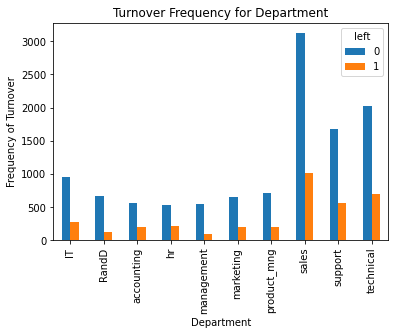

In [86]:
import matplotlib.pyplot as plt
pd.crosstab(raw_data.sales,raw_data.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

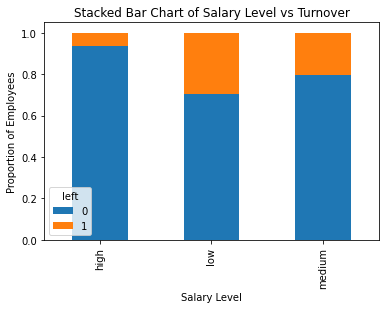

In [87]:
table=pd.crosstab(raw_data.salary, raw_data.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

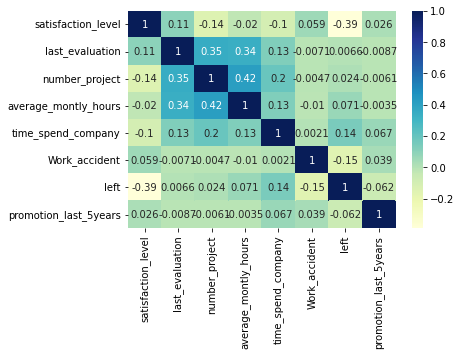

In [88]:
dfplot = sns.heatmap(num_data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [89]:
num_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [90]:
sample = num_data['satisfaction_level'].sample(8)
print("Sample:\n",sample)
print("\n\ns:", 0.248631)
print("x-bar:", sample.mean())
print("n: 8")
SE = 0.248631/np.sqrt(8)
print("SE: ", SE)

t_stat, p_value = sp.stats.ttest_1samp(a=sample, popmean=8)
print("p-value:", p_value, "\nt-stat", t_stat)

if t_stat >  0.248631:
  print("H0 rejected")
else:
  print("H0 accepted")



if p_value >0.1:
  print("Non significant evidence against H0")
elif p_value > 0.05 and p_value <= 0.1:
  print("Marginally significant evidence against H0") 
elif p_value > 0.01 and p_value <= 0.05:
  print("Significant evidence against H0") 
else:
  print("Highly significant evidence against H0")

Sample:
 11671    0.71
13924    0.63
6439     0.18
11562    0.76
8156     0.45
497      0.59
4924     0.83
9484     0.75
Name: satisfaction_level, dtype: float64


s: 0.248631
x-bar: 0.6124999999999999
n: 8
SE:  0.08790433305659624
p-value: 2.8248334023288084e-12 
t-stat -99.01210103195382
H0 accepted
Highly significant evidence against H0


Here, I am performing the hypothesis test using t-test and p-value
If Tstat > Talpha, H0 gets rejected else accepted. Also, if p-value is less than alpha then H0 is rejected else accepted.